In [1]:
import pandas as pd 
import numpy as np

# Predictive model for individuals health insurance charges base on  demographic and health related information. 

   ****Collect and prepare data(cleaning and transforming)***
   
   ****Choose the needed predictive model***
   
   ****Train, validate and implement the model***

##  Regression algorithms

In [2]:
hip_df = pd.read_csv('insurance.csv')

In [3]:
hip_df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [4]:
hip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***There is no non dull value and all the dtype are accurate.***

In [5]:
hip_df.duplicated().sum()

1

In [6]:
hip_df.drop_duplicates(inplace=True)

In [7]:
hip_df.duplicated().sum()

0

***One duplicated file and deleted.***

In [8]:
columns = hip_df.columns

In [9]:
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
hip_df.rename(columns={'children':'no of children'}, inplace=True)
hip_df.rename(columns={'charges':'charges ($)'}, inplace=True)

  ## Data Dictionary for this dataset
  
  **Age**: Numeric variable representing the age of the individual in years.

   **Sex**: Categorical variable indicating the gender of the individual. Possible values could be "Male" or "Female".

   **BMI (Body Mass Index)**: Numeric variable representing the Body Mass Index of the individual, calculated as weight (kg) divided by height (m) squared.

   **Number of Children**: Numeric variable representing the number of children/dependents covered by the insurance.

   **Smoker**: Categorical variable indicating whether the individual is a smoker or not. Possible values could be "Yes" or "No".

   **Region**: Categorical variable indicating the geographic region of the individual's residence. Possible values could be "Northeast", "Northwest", "Southeast", or "Southwest".

   **Charges**: Numeric variable representing the medical insurance charges/costs associated with the individual's insurance policy. This could be in any currency (e.g., USD).

In [11]:
hip_df.describe()

,age,bmi,no of children,charges ($)
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
hip_df.to_csv('Health insurance clean_dataset')

***Standard deviation is low and the mean is high**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [14]:
hip_df_Region = hip_df.groupby(by='region')[['charges ($)']].mean()

In [15]:
hip_df_Region

,charges ($)
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


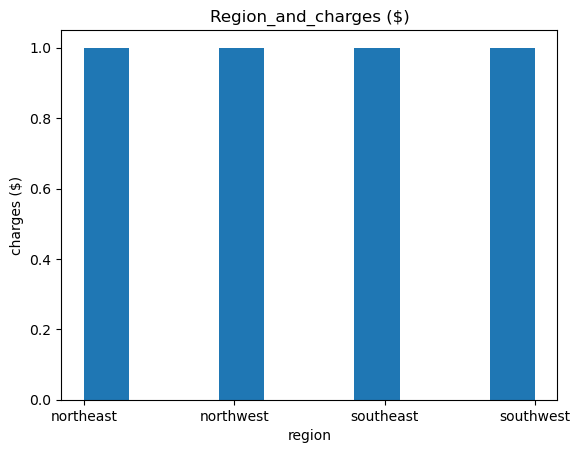

In [16]:
plt.hist(hip_df_Region.index)
plt.title('Region_and_charges ($)')
plt.xlabel('region')
plt.ylabel('charges ($)')
plt.show()

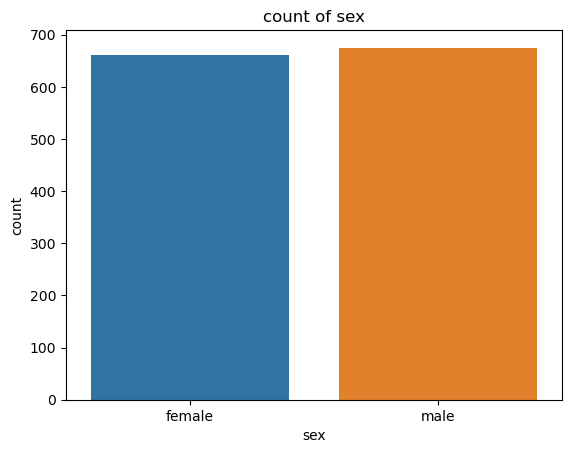

In [17]:
sb.countplot(x='sex',data=hip_df)
plt.title('count of sex')
plt.show()

In [18]:
cat_df = hip_df.select_dtypes(include=['category','object'])
cat_columns = [i for i in cat_df.columns]

In [19]:
cat_columns

['sex', 'smoker', 'region']

In [20]:
for i in cat_columns:
    print(cat_df[i].value_counts())
    print('--------------------')

sex
male      675
female    662
Name: count, dtype: int64
--------------------
smoker
no     1063
yes     274
Name: count, dtype: int64
--------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
--------------------


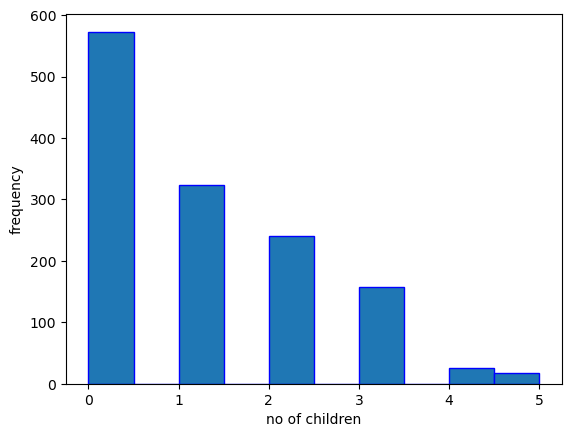

In [21]:
plt.hist(hip_df['no of children'], edgecolor= 'blue')
plt.xlabel('no of children')
plt.ylabel('frequency')
plt.show()

In [22]:
hip_df['no of children'].count()

1337

In [23]:
from sklearn.linear_model import LinearRegression

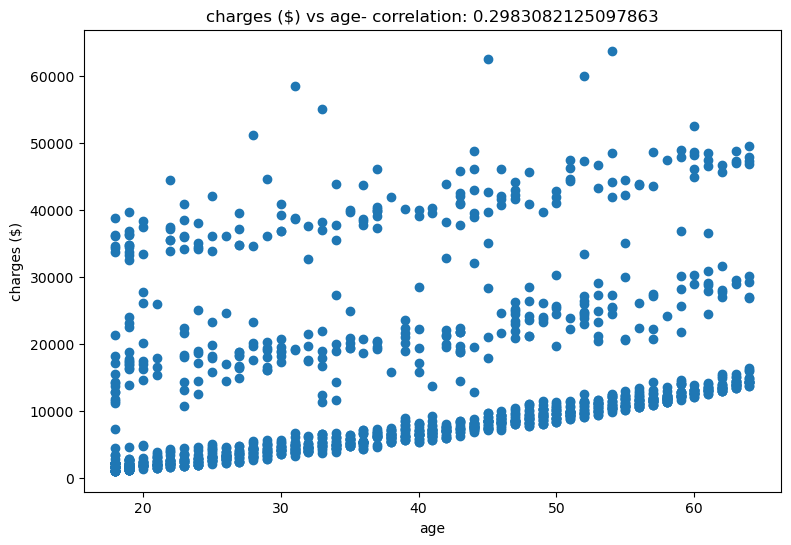

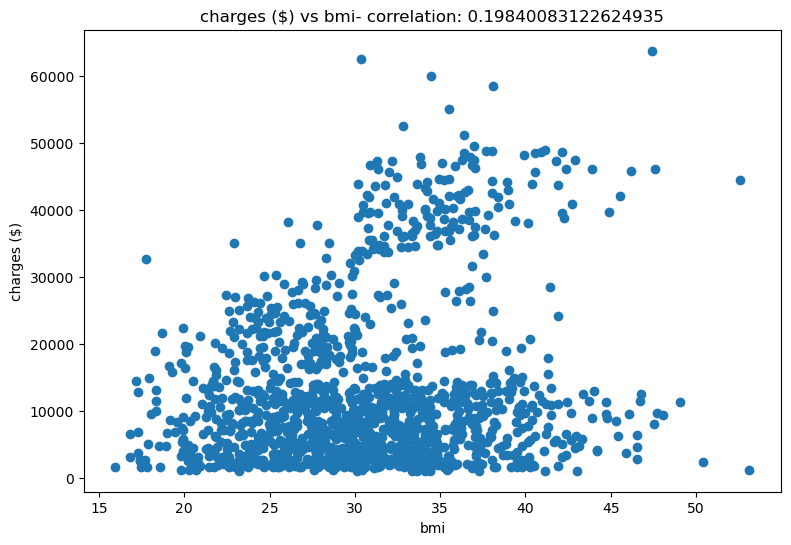

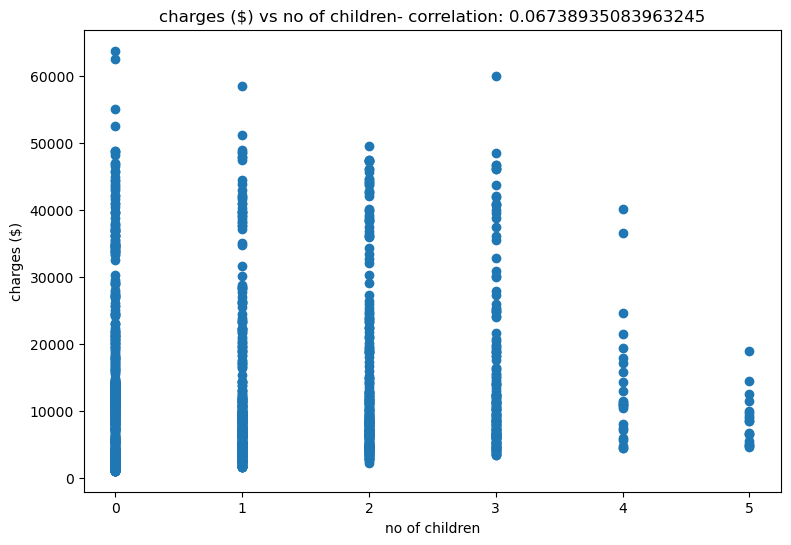

In [24]:
numeric_features = ['age','bmi','no of children']
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = hip_df[col]
    label = hip_df['charges ($)']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('charges ($)')
    ax.set_title('charges ($) vs ' + col + '- correlation: ' + str(correlation))
plt.show()

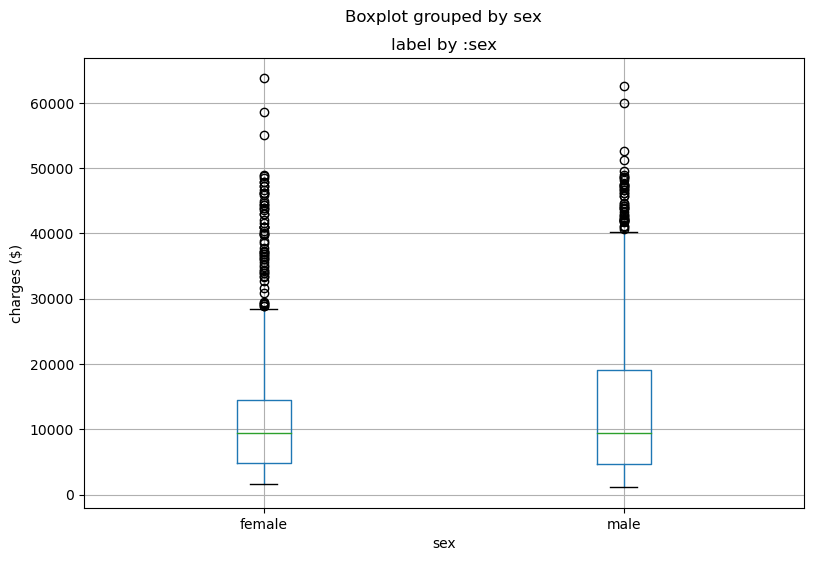

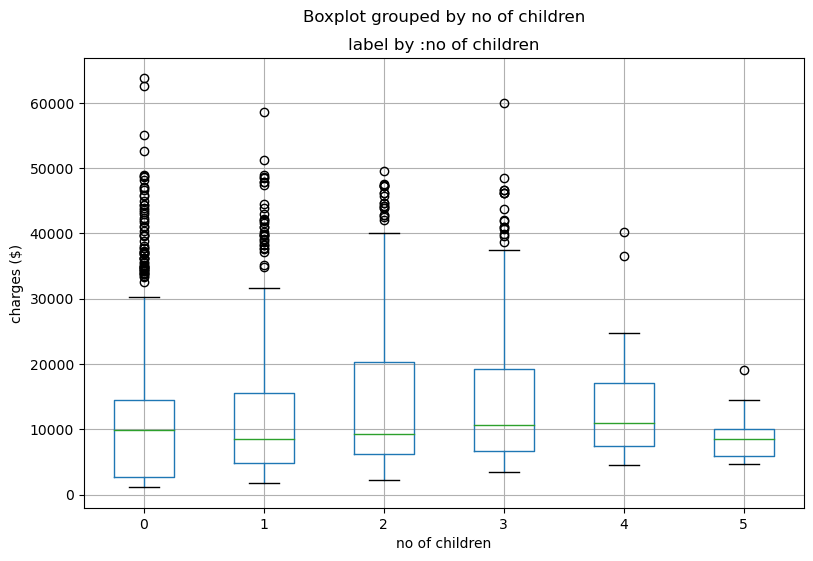

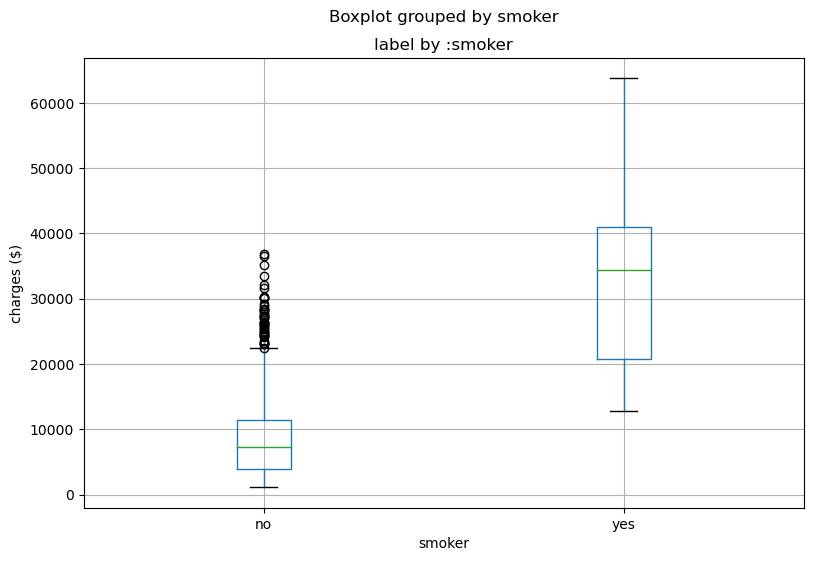

In [25]:
categorical_features = ['sex','no of children','smoker']
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    hip_df.boxplot(column = 'charges ($)',by = col, ax=ax)
    ax.set_title('label by :' + col)
    ax.set_ylabel("charges ($)")
plt.show()



## Select the features

In [26]:
x=hip_df.drop( 'charges ($)', axis=1)
y= hip_df.loc[:, 'charges ($)']

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

x['sex'] = x['sex'].replace(
{
    'female' :0,
    'male'  :1
})

x['region'] = x['region'].replace({
    'northeast' : 0,
    'northwest' : 1,
    'southeast' : 2,
    'southwest' : 3
})

x['smoker'] = x['smoker'].replace({
    'yes' : 0,
    'no' : 1
})

In [28]:
x.head()

,age,sex,bmi,no of children,smoker,region
0,19,0,27.900,0,0,3
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,1
4,32,1,28.880,0,1,1


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit(x)
scaled_x = model.transform(x)

In [30]:
scaled_x

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416, -1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162,  0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347,  0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416,  0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416,  0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416, -1.96966039,
        -0.46712816]])

In [31]:
scaled_x_new = SelectKBest(k=4).fit_transform(x,y)

scaled_x_new

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


array([[27.9 ,  0.  ,  0.  ,  3.  ],
       [33.77,  1.  ,  1.  ,  2.  ],
       [33.  ,  3.  ,  1.  ,  2.  ],
       ...,
       [36.85,  0.  ,  1.  ,  2.  ],
       [25.8 ,  0.  ,  1.  ,  3.  ],
       [29.07,  0.  ,  0.  ,  1.  ]])

In [32]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(scaled_x_new, y, test_size =0.30,random_state =0)

In [33]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(x_train, y_train)
print (model)

LinearRegression()


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2) 


MSE: 54779014.81214817
RMSE: 7401.284673092109
R2: 0.665491181515852


MSE: 54779014.81214817
RMSE: 7401.284673092109
R2: 0.665491181515852


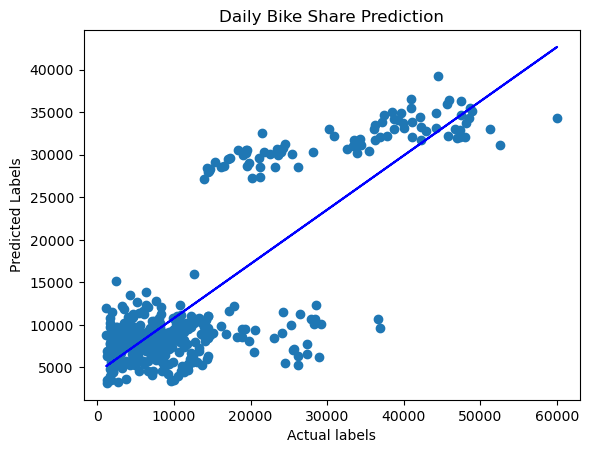

In [38]:
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2) 

plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Prediction')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color = 'blue')
plt.show()

